<b>1. Datasets</b>

<b>2. tensorflow keras things</b>

<b>3. Build a binary classification model</b>

<b>4. Нелийные НС</b>

<b>5. Сверточные НС</b>

<b>6. Рекурентные НС</b>

<b>7. Evaluator - позволяет автоматизированно компилировать и получать скоры разных моделей</b>

<b>8. Models - класс для построения моделей </b>

<b>9.  Autoencoders (Автоэнкодер)</b>

<b>10. Variational autoencoder (Вариационный автоэнкодер)</b>

<b>11. Инструкция по Tensorboard</b>

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd # Для работы с данными
import numpy as np  
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

import warnings
warnings.filterwarnings('ignore')

# 1. Datasets

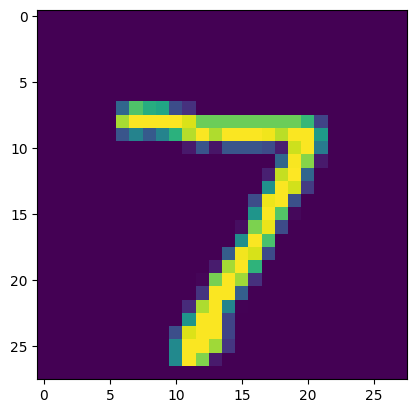

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
plt.imshow(x_test[0].reshape(28,28))

In [ ]:
## CIFAR10
# 60000 RGB pictires with size 32x32x3
# 10 classes: 'airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'

from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Visualization of some pictures
plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

In [ ]:
#  datasets with a different types of clothes
fashion_mnist = tf.keras.datasets.fashion_mnist 

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# dataset witn words and part of speeches
import nltk

nltk.download('brown')
nltk.download('universal_tagset')
data = nltk.corpus.brown.tagged_sents(tagset='universal')
all_tags = ['#EOS#','#UNK#','ADV', 'NOUN', 'ADP', 'PRON', 'DET', '.', 'PRT', 'VERB', 'X', 'NUM', 'CONJ', 'ADJ']

data = np.array([ [(word.lower(),tag) for word,tag in sentence] for sentence in data ]) # work for numpy == 1.23.5

# Showing data
from IPython.display import HTML, display
def draw(sentence):
    words,tags = zip(*sentence)
    display(HTML('<table><tr>{tags}</tr>{words}<tr></table>'.format(
                words = '<td>{}</td>'.format('</td><td>'.join(words)),
                tags = '<td>{}</td>'.format('</td><td>'.join(tags)))))


draw(data[11])
draw(data[10])
draw(data[7])

"""
NOUN	VERB
merger	proposed
"""

# 2. tensorflow  keras things

In [ ]:
# cloling model 
model_1 = keras.models.clone_model(model)


#  Агументации https://keras.io/api/layers/preprocessing_layers/image_augmentation/
keras.layers.RandomCrop(30, 30, 3),
keras.layers.RandomRotation(factor=(-0.02, 0.02)),

In [ ]:
"""
По умолчанию keras.layers.Dense будет применяться один раз ко всем согласованным шагам времени (Dense would apply once to all time-steps concatenated). 
Мы используем keras.layers.TimeDistributed для изменения Dense слоя таким образом, 
чтобы он применялся как по пакетной, так и по временной оси.
"""

stepwise_dense = L.Dense(len(all_tags),activation='softmax')
stepwise_dense = L.TimeDistributed(stepwise_dense) #This wrapper allows to apply a layer to every temporal slice of an input.
model.add(stepwise_dense)

# 3. Build a binary classification model

<b> Dropout </b>

Метод регуляризации искусственных нейронных сетей, предназначен для уменьшения переобучения сети за счет предотвращения сложных адаптаций отдельных нейронов на тренировочных данных во время обучения.

Характеризует исключение определённого процента (например 50%) случайных нейронов на разных итерациях во время обучения нейронной сети. В результате  обучение происходит более общее, нет надежды на определенные нейроны. Такой приём значительно увеличивает скорость обучения, качество обучения на тренировочных данных, а также повышает качество предсказаний модели на новых тестовых данных.

На моменте предсказания все нейроны включаются обратно, dropout не используется.

<img src='https://drive.google.com/uc?export=view&id=1KQrdTDanDkLhf8Kn8c5ryjqN2acwYWII' width=500>

<img src='https://drive.google.com/uc?export=view&id=1j8SxKYEi12jzJXi_bPO28q5SV9emuu0Y'>

In [ ]:
from tensorflow import keras

# hid_size - скрытый слой, количество нейронов в промежуточных слоях.
hid_size = 256

# Шаг 1. задание Sequential - модель с линейной(полносвязной) последовательностью слоев
model = keras.Sequential(
    [
        # layers.Dense - линейный полносвязный слой
        keras.layers.Dense(
            #hid_size - число нейронов, для первого слоя прописывается input_shape - сколько признаков придет на вход
            hid_size, activation="relu", input_shape=(train_features.shape[-1],)
        ), # fully-connected y^1
        keras.layers.Dense(hid_size, activation="relu"), # y^2
        
        # Dropout - удалить 30% нейронов
        keras.layers.Dropout(0.3),
        keras.layers.Dense(hid_size, activation="relu"), # y^3
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"), # y^4
    ]
)
model.summary()


# Шаг 2. создание списка метрик который мониториться во время обучения
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]


# Шаг 3. компиляция, включает в себя:
## optimizer - задание оптимизатора
## loss - функция потерь
## список метрк 
model.compile(
    optimizer=keras.optimizers.Adam(1e-2),
    loss="binary_crossentropy",
    metrics=metrics
)


# callbacks - позволяет хранить промежуточные чекпоинты\сохранять ч-л\т.п.
callbacks = [
    keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5"),
    keras.callbacks.EarlyStopping(),
    keras.callbacks.ReduceLROnPlateau()
]

# class_weight хранит веса для разных классов
class_weight = {0: weight_for_0, 1: weight_for_1}


# запускаем обучение
model.fit(
    train_features,       # признаки для обучения X_train
    train_targets,        # таргеты , y_train
    batch_size=2048,      # размер бача (сколько примеров даем НС в рамках одной эпохи, т.е. все примеры делим на бачи, каждый размеом 2048)
    epochs=30,            # количество эпох - сколько раз пройдем по ВСЕМУ дата сету ЦЕЛИКОМ
    callbacks=callbacks,  # сохранение чекпоинтов
    validation_data=(val_features, val_targets),   # данные для валидации , turple (x_val, y_val)
    class_weight=class_weight,     # для балансировки классов
)


# 4. Нелнейные НС
Однако на практике не все модели удается реализовать с помощью keras.Sequential.

Если в модели присутствует "нелинейная" структура (т.е. есть разветвление потока данных), то ```keras.Sequential()``` не подойдет для построения такой модели. На помощь приходит инструмент *functional API*.


Рассмотрим следующую модель:

```
(input: 784-dimensional vectors)
    
       ↧
    
[Dense (32 units, relu activation)]
    
       ↧
    
[Dense (32 units, relu activation)]
    
       ↧
    
[Dense (10 units, softmax activation)]
    
       ↧
    
(output: logits of a probability distribution over 10 classes)
```


Обычно в глубоком обучении принято использовать следующую структуру во входных данных:

$$[n, N_{ch}, W,H],$$

где $n$ - размер подвыборки (batch_size), 

$N_{ch}$ - кол-во каналов (красный, зеленый, синий), 

$W$, $H$ - ширина и высота изображения. 


Однако batch_size не указывается при объявлении слоев в Keras. 


In [ ]:
# Input() используется для создания экземпляра тензора Кераса.
#Тензор Кераса - это символический тензорный объект, который мы дополняем определенными атрибутами, позволяющими нам построить модель Кераса, просто зная входы и выходы модели.

img_inputs = keras.Input(shape=(32, 32, 3))
print(img_inputs.shape)


На сегодняшний день мы пока забудем о вышеописанной структуре и будем все входные данные трактовать как один длинный вектор длины  $(N_{ch}\cdot W \cdot H)$.

In [ ]:
inputs = keras.Input(shape=(784,))

print("Shape of input is", inputs.shape)
print("Data type of input is", inputs.dtype)

In [ ]:
#Следующий слой, который будет использовать тензор inputs как входные данные, должен быть объявлен следующим образом:
#  создание нелинейной НС
## тут создаются две ветви: x и y. Далее из них будет формироватсья финальное предсказание.


### шаг 1. объявление слоя x
x = layers.Dense(32)(inputs)        #создание слоя Dense x, на входе inputs, на выходе 32 нейрона
x = layers.BatchNormalization()(x)  #нормализация слоя
x = layers.Dropout(0.5)(x)          #Dropout 
x = layers.Activation('relu')(x)    #фун активации Relu

# еще один полносвязный слой с 32 нейронами и фун. активации Relu
dense21 = layers.Dense(32, activation="relu")(x)   


### Шаг 2. объявление слоя y (по сути зеркален х)
y = layers.Dense(32)(inputs)       #создание слоя Dense y, на входе inputs
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.5)(y)
y = layers.Activation('relu')(y)

dense22 = layers.Dense(32, activation='relu')(y)


# Шаг 3. суммирование тензоров
dense3 = layers.Add()([dense21, dense22])


# Шаг 4. еще парочку полносвязных слоев
z = layers.Dense(32, activation="relu")(dense3) # слой с 32 нейронами на выходе и на входе dense3
outputs = layers.Dense(10)(z)  # выходной слой с 10 нейронами (напирмер для классификации 10 рукописных цифр)


# Шаг 5. На этом этапе мы можем закончить добавление новых блоков и объявить модель, которая будет состоять из данных слоёв.
model = keras.Model(inputs=inputs, outputs=outputs, name="our_first_model")
model.summary()   # инфа по модели
keras.utils.plot_model(model, "my_first_model.png") # нарисовать модель в виде направленного графа.
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)  # нарисовать модель в виде направленного графа с указанием shapes.


# Шаг 6. Подготовка данных
## загрузка датасета
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
## Нормализация картинок, перевод яркости из значения [0,255] -> [0,1]
x_train = x_train.reshape(60000, 784).astype("float32") / 255.
x_test = x_test.reshape(10000, 784).astype("float32") / 255.


# Шаг 7. Компиляция, включает в себя:
## optimizer - задание оптимизатора
## loss - функция потерь
## список метрк 
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), ### from_logits - а-ля софтмакс вшитый SparseCategoricalCrossentropy (который не указан при инициализации outputs)
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)


# Шаг 8. Обучение модели
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)


# Шаг 9. Предсказание и результаты
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])


# Шаг 10. Сохранение модели. 
## Без callback сохраняется посл. эпоха.
## Также читай про EarlyStopping https://keras.io/api/callbacks/early_stopping/
"""
model.save() при вызове сохраняет модель в один файл. 
Сохраненный файл включает в себя:
-архитектуру модели;
-веса модели;
-config-file (если такой был создан при компиляции);
-оптимизатор и его состояние.
"""
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")



# 5. Сверточные НС

In [ ]:
# Разбиение выборки на обучение и ВАЛИДАЦИЮ
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=42)


# Шаг 1. Задаем модель. 
# Sequential - линейная последовательность слоев
model = tf.keras.models.Sequential([
    
    ### Этап 1 - feature selection
    # 1ый слой: Сверточный слой с filters(количеством фильтров), kernel_size(размер сверточного фильтра), padding='same'(на входе 28х28 и на выходе 28х28)
    # т.к. это первый слой , указываем размер входного тензора input_shape
    tf.keras.layers.Conv2D(filters=6,
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu',
                           input_shape=x_train.shape[1:]),
    
    # 2ой слой: Пулинг, с разбивкой на сегменты 2х2 (pool_size); padding='valid' - паддинг не добавляется. На выходе 14х14х6(число фильтров)
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    # 3ий слой:  Сверточный слой с filters(количеством фильтров) = 16 (стало больше)
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(5, 5),
                           padding='same',
                           activation='relu'),
    
    # 4ыой слой: Пулинг
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
    
    ### Этап 2 - перцептрон
    #Вытягивание в вектор: на входе (N,C,H,W) -> на выходе (N, C*H*W)
    tf.keras.layers.Flatten(),
    
    #Полносвязный слой с relu
    tf.keras.layers.Dense(32, activation='relu'),
    
    #Полносвязный финальный слой с softmax
    tf.keras.layers.Dense(10, activation='softmax')])


# Шаг 2. Компиляция модели с указанием оптимизатора, функции потерь и метрики качества.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',   # or 'sparse_categorical_crossentropy' when there isn't one-hot coding
              metrics=['accuracy'])              # or 'sparse_categorical_accuracy' when there isn't one-hot coding


model.summary()
# Total params: N, большнство из которых в dense (последних слоях), тогда как сверточный слов содержит сильно меньше M . N >> M


# Шаг 3. По необходиомсти перевод лейблов в categorical (One-hot кодировка разметки) (или используй sparse_categorical_)
#y_train, y_val = (keras.utils.to_categorical(y) for y in (y_train, y_val))
y_train_labels = tf.keras.utils.to_categorical(y_train)


# Шаг 4. Обучение
model.fit(x_train, 
          y_train_labels,
          batch_size=32, 
          epochs=5,
          validation_split=0.2)


# Шаг 5. Модель выдает 10 вероятностей к каждому классу. Используем argmax для получения индекса максимальной веротности.
y_pred = model.predict(x_val)
y_pred_labels = np.argmax(y_pred, axis=1)


# Шаг 6. Оцениваем качество решение на валидационной выборке
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, y_pred_labels))

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_labels))



# Шаг 7. Формирование файлика со всеми предсказаниями на тестовой выборке.
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_pred_test_labels, 1):
        dst.write('%s,%d\n' % (i, p))

# 6. Рекурентные НС
также смотри ipunb  файл Введение в рекурентные сети и github 02_rnn.ipynb

была задача по описаниях вакансий предсказывать уровень их зарплат.

In [ ]:
# различные вспомогательные функции

# map() -  когда нужно применить функцию преобразования к каждому элементу в коллекции или в массиве и преобразовать их в новый массив.
UNK, PAD = "UNK", "PAD"
UNK_IX, PAD_IX = map(token_to_id.get, [UNK, PAD])

# функция переводит набор текстовых последовательностей в матрицу (тензор)
def as_matrix(sequences, max_len=None):
    """ 
    Convert a list of tokens into a matrix with padding 

    Lines:
    engineering systems analyst
    Matrix:
    [[ 624 1701  133]]
    """
    if isinstance(sequences[0], str):
        sequences = list(map(str.split, sequences))
        
    max_len = min(max(map(len, sequences)), max_len or float('inf'))
    
    matrix = np.full((len(sequences), max_len), np.int32(PAD_IX))
    for i,seq in enumerate(sequences):  # enumerate() – сразу индекс элемента и его значение.
        row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
        matrix[i, :len(row_ix)] = row_ix
    
    return matrix



# функция создания батча: упаковка текстов и категориальных признаков для передачи в нейронку
def make_batch(data, max_len=None, word_dropout=0):
    """
    Creates a keras-friendly dict from the batch data.
    :param word_dropout: replaces token index with UNK_IX with this probability
    :returns: a dict with {'title' : int64[batch, title_max_len]
    """
    batch = {} # содержит по ключам различные модальности
    batch["Title"] = as_matrix(data["Title"].values, max_len) # батч тайтл содержит тензор с тайтлами
    batch["FullDescription"] = as_matrix(data["FullDescription"].values, max_len) # батч FullDescription содержит тензор с описаниями
    batch['Categorical'] = categorical_vectorizer.transform(data[categorical_columns].apply(dict, axis=1))
    
    if word_dropout != 0:
        batch["FullDescription"] = apply_word_dropout(batch["FullDescription"], 1. - word_dropout)
    
    if target_column in data.columns:
        batch[target_column] = data[target_column].values  # в целевую колонку передаем живые значения
    
    return batch


# хз что это такое 
def apply_word_dropout(matrix, keep_prop, replace_with=UNK_IX, pad_ix=PAD_IX,):
    dropout_mask = np.random.choice(2, np.shape(matrix), p=[keep_prop, 1 - keep_prop])  # Генерирует случайную выборку из заданного 1-D массива
    dropout_mask &= matrix != pad_ix  # создание некой маски удаления элементов
    return np.choose(dropout_mask, [matrix, np.full_like(matrix, replace_with)])



# функция которая строит, компилирует и возвращает модель
## n_tokens - всего токенов в тексте
## n_cat_features - количество категориальных признаков
def build_model(n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=64):
    """ Построение модели, отображающей три источника данных в единый линейный выход: предсказанное значение """
    
    # задаем три входа
    l_title = L.Input(shape=[None], name="Title")  #shape пока неизвестен , т.к. будет меняться
    l_descr = L.Input(shape=[None], name="FullDescription")
    l_categ = L.Input(shape=[n_cat_features], name="Categorical")
    
    # задаем слой embedding, который будет обрабатывать и title и description (имеет смысл задать один эмбеддинг т.к. слова в title и вуыскшзешщт могут пересекаться оч сильно)
    emb = L.Embedding(n_tokens, 2 * hid_size)
    
    l_title_emb = emb(l_title)
    l_descr_emb = emb(l_descr)
    
    
    ## embedding передаем в сверточные слои, тут одномерная свертка
    ## kernel_size = 2 или 5 => аггрегируем информацию с 2 или 5 последовательных слов
    l_title_conv = L.Convolution1D(hid_size, kernel_size=2, activation='relu')(l_title_emb)
    l_descr_conv = L.Convolution1D(hid_size, kernel_size=5, activation='relu')(l_descr_emb)
    
    
    ## Max Pooling 
    l_title_out = L.GlobalMaxPool1D()(l_title_conv)
    l_descr_out = L.GlobalMaxPool1D()(l_descr_conv)
    
    # Категориальные признаки обрабатываем с помощью линейного слоя
    l_categ_out = L.Dense(hid_size, activation='relu')(l_categ)
    
    # получаем выходы трех ветвей l_title_out, l_descr_out и l_categ_out - которые нужно объединить
    
    # Объединяем с помощью Concatenate
    l_combined = L.Concatenate()([l_title_out, l_descr_out, l_categ_out])
    
    # Комбинированный тензор передаем в многослойный перцептрон
    l_dense_clf = L.Dense(hid_size, activation='relu')(l_combined)
    
    
    output_layer = L.Dense(1)(l_dense_clf)
    # end of your code
    
    
    # Объединение всего с помощью models.Model
    model = keras.models.Model(inputs=[l_title, l_descr, l_categ], outputs=[output_layer])
    
    # Компиляция модели
    model.compile('adam', 'mean_squared_error', metrics=['mean_absolute_error'])
    return model



# функция которая нужна для кастомного load - которая из csv вытягиваем бачи
def iterate_minibatches(data, batch_size=256, shuffle=True, cycle=False, **kwargs):
    """ iterates minibatches of data in random order """
    while True:
        indices = np.arange(len(data))
        if shuffle:
            indices = np.random.permutation(indices)

        for start in range(0, len(indices), batch_size):
            batch = make_batch(data.iloc[indices[start : start + batch_size]], **kwargs)
            target = batch.pop(target_column)
            yield batch, target
        
        if not cycle: break

In [ ]:
# Постоение модели и вывод основной информации о ней
model = build_model()
model.summary()

# Всего параметров более N млн
# Больше всего весов на слое эмбедингов - тоже более N млн, т.к. слой эмбединг для каждого индекса сопостовлят вектор


dummy_pred = model.predict(make_batch(data_train[:100]))
dummy_loss = model.train_on_batch(make_batch(data_train[:100]), data_train['Log1pSalary'][:100])[0]

    
batch_size = 256
epochs = 10            # definitely too small
steps_per_epoch = 100  # for full pass over data: (len(data_train) - 1) // batch_size + 1

model = build_model()


#Теперь мы можем подогнать нашу модель обычным способом. Интересно то, что мы тренируемся на бесконечном потоке мини-пакетов, производимых функцией iterate_minibatches.
model.fit_generator(iterate_minibatches(data_train, batch_size, cycle=True, word_dropout=0.05), 
                    epochs=epochs, steps_per_epoch=steps_per_epoch,
                    
                    validation_data=iterate_minibatches(data_val, batch_size, cycle=True),
                    validation_steps=data_val.shape[0] // batch_size
                   )


def print_metrics(model, data, batch_size=batch_size, name="", **kw):
    squared_error = abs_error = num_samples = 0.0
    for batch_x, batch_y in iterate_minibatches(data, batch_size=batch_size, shuffle=False, **kw):
        batch_pred = model.predict(batch_x)[:, 0]
        squared_error += np.sum(np.square(batch_pred - batch_y))
        abs_error += np.sum(np.abs(batch_pred - batch_y))
        num_samples += len(batch_y)
    print("%s results:" % (name or ""))
    print("Mean square error: %.5f" % (squared_error / num_samples))
    print("Mean absolute error: %.5f" % (abs_error / num_samples))
    return squared_error, abs_error
    
print_metrics(model, data_train, name='Train')
print_metrics(model, data_val, name='Val');

<b>Bonus part: explaining model predictions</b>

данный код помогает определить какие именно слова больше всего повлияли на предсказание.

It's usually a good idea to understand how your model works before you let it make actual decisions. It's simple for linear models: just see which words learned positive or negative weights. However, its much harder for neural networks that learn complex nonlinear dependencies.

There are, however, some ways to look inside the black box:
* Seeing how model responds to input perturbations
* Finding inputs that maximize/minimize activation of some chosen neurons (_read more [on distill.pub](https://distill.pub/2018/building-blocks/)_)
* Building local linear approximations to your neural network: [article](https://arxiv.org/abs/1602.04938), [eli5 library](https://github.com/TeamHG-Memex/eli5/tree/master/eli5/formatters)

Today we gonna try the first method just because it's the simplest one.

In [ ]:
def explain(model, sample, col_name='Title'):
    """ Computes the effect each word had on model predictions """
    sample = dict(sample)
    sample_col_tokens = [tokens[token_to_id.get(tok, 0)] for tok in sample[col_name].split()]
    data_drop_one_token = pd.DataFrame([sample] * (len(sample_col_tokens) + 1))

    for drop_i in range(len(sample_col_tokens)):
        data_drop_one_token.loc[drop_i, col_name] = ' '.join(UNK if i == drop_i else tok
                                                   for i, tok in enumerate(sample_col_tokens)) 

    *predictions_drop_one_token, baseline_pred = model.predict(make_batch(data_drop_one_token))[:, 0]
    diffs = baseline_pred - predictions_drop_one_token
    return list(zip(sample_col_tokens, diffs))


from IPython.display import HTML, display_html

def draw_html(tokens_and_weights, cmap=plt.get_cmap("bwr"), display=True,
              token_template="""<span style="background-color: {color_hex}">{token}</span>""",
              font_style="font-size:14px;"
             ):
    
    def get_color_hex(weight):
        rgba = cmap(1. / (1 + np.exp(weight)), bytes=True)
        return '#%02X%02X%02X' % rgba[:3]
    
    tokens_html = [
        token_template.format(token=token, color_hex=get_color_hex(weight))
        for token, weight in tokens_and_weights
    ]
    
    
    raw_html = """<p style="{}">{}</p>""".format(font_style, ' '.join(tokens_html))
    if display:
        display_html(HTML(raw_html))
        
    return raw_html



i = 36605
tokens_and_weights = explain(model, data.loc[i], "Title")
draw_html([(tok, weight * 5) for tok, weight in tokens_and_weights], font_style='font-size:20px;');

tokens_and_weights = explain(model, data.loc[i], "FullDescription")
draw_html([(tok, weight * 10) for tok, weight in tokens_and_weights]);



i = 12077
tokens_and_weights = explain(model, data.loc[i], "Title")
draw_html([(tok, weight * 5) for tok, weight in tokens_and_weights], font_style='font-size:20px;');

tokens_and_weights = explain(model, data.loc[i], "FullDescription")
draw_html([(tok, weight * 10) for tok, weight in tokens_and_weights]);


i = np.random.randint(len(data))
print("Index:", i)
print("Salary (gbp):", np.expm1(model.predict(make_batch(data.iloc[i: i+1]))[0, 0]))

tokens_and_weights = explain(model, data.loc[i], "Title")
draw_html([(tok, weight * 5) for tok, weight in tokens_and_weights], font_style='font-size:20px;');

tokens_and_weights = explain(model, data.loc[i], "FullDescription")
draw_html([(tok, weight * 10) for tok, weight in tokens_and_weights]);

# 7 Evaluator - позволяет автоматизированно компилировать и получать скоры разных моделей

In [ ]:
## class Evaluator: child class from list
class Evaluator(list):
    
    ## Constuctor
    def __init__(self, models, optimizers='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=[keras.metrics.sparse_categorical_accuracy]):
        '''
            models: dict {name: model}
            optimizers: list of optimizers or just one optimizer
        '''
        
        if not isinstance(models, dict):  # checking: object [models] is instance of class dict ? or not
            models = {'single_model': models}
            
        if not isinstance(optimizers, dict):
            optimizers = {str(optimizers.__class__): optimizers}
            
        
        # initing an object list, where each element is turple: (Model Name, Copy of Model, Optimizer Name, Optimizer Object)
        super().__init__( 
                            [
                                (model_name, keras.models.clone_model(model), optimizer_name, optimizer)
                                for model_name, model in models.items()
                                for optimizer_name, optimizer in optimizers.items()
                            ]
                        )
        
        #Compiling of models
        for _, model, _, optimizer in self:
            model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    
    # Education. writing logs, construct graphics (epochs, metric value)
    def fit(self, X, y, validation_data=(), max_epochs=100, verbose=0, callbacks=[], batch_size=32, tensorboard=True):
        if not isinstance(callbacks, list):
            callbacks = [callbacks]
        
        histories = []   
        
        for model_name, model, optimizer_name, optimizer in tqdm_notebook(self):
            history = model.fit(
                              X, 
                              y, 
                              validation_data=validation_data or None, 
                              epochs=max_epochs, 
                              verbose=verbose,
                              batch_size=batch_size, 
                              callbacks=callbacks 
                                        + [keras.callbacks.TensorBoard(log_dir=os.path.join(os.getcwd(), 'logs\\{}_{}'.format(model_name, optimizer_name)))] if tensorboard else []
                             )
            histories.append((history, model_name, optimizer_name))
            
            
        # Visualization using History
        plt.figure(figsize=[18,12])
        for i in range(len(histories)):
            plt.subplot(len(histories)//3, 3, i + 1)
            plt.plot(histories[i][0].history['sparse_categorical_accuracy'], label='test')
            plt.plot(histories[i][0].history['val_sparse_categorical_accuracy'], label='validation')
            plt.legend()
            plt.xlabel(f'{histories[i][1]}:{histories[i][2]}')
            plt.ylabel('Accuracy')
        

        
    # ???
    def fit_generator(self, X, y, validation_data=(), max_epochs=100, verbose=1, callbacks=[], batch_size=32):
        datagen = keras.preprocessing.image.ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
        )
        
        if not isinstance(callbacks, list):
            callbacks = [callbacks]
            
        for model_name, model, optimizer_name, optimizer in tqdm_notebook(self):
            model.fit_generator(datagen.flow(
                                             X, 
                                             y, 
                                             batch_size=batch_size
                                            ), 
                                epochs=max_epochs,
                                validation_data=validation_data or None, 
                                verbose=verbose,
                                callbacks=callbacks + [keras.callbacks.TensorBoard(log_dir=os.path.join(os.getcwd(), 'logs\\{}_{}'.format(model_name, optimizer_name)))]
                               )

    
    # Final score
    def evaluate(self, X, y, metric):
        for model_name, model, optimizer_name, _ in self:
            print('Final score of {}_{} is {}'.format(model_name, optimizer_name,
                  metric(y_test, np.argmax(model.predict(X_test), axis=1))))

In [ ]:
optimizers = { 
                'SGD': keras.optimizers.legacy.SGD(),  
                'Adam': keras.optimizers.legacy.Adam(),  
                'RMSprop': keras.optimizers.legacy.RMSprop()
              }


models = { 
                'tiny': model_1,
                'conv': model_2
              }


evaluator = Evaluator(models, optimizers=optimizers)
evaluator.fit(X_train, y_train, validation_data=(X_val, y_val))
evaluator.evaluate(X_test, y_test, accuracy_score)

# 8. Models - класс для построения моделей

In [ ]:
## !!! important about BatchNormalization
## The general use case is to use BN between the linear and non-linear layers in your network, 
## because it normalizes the input to your activation function

## class Models: child from OrderedDict. The class might add a new layer to a model
class Models(OrderedDict):
    
    # Constructor
    def __init__(self, models):
        if not isinstance(models, dict):
            models = OrderedDict({'base_model': models})
        super().__init__(models)

    # Add a new layer to a every model in dict
    def add(self, layer):
        for name, model in self.items():
            model.add(layer)  # add layers to the end of model

    
    # create model "name" by updating first element (base model)
    def add_create(self, name, layer):
        base_model = next(iter(self.items()))[1]
        new_model = keras.models.clone_model(base_model)
        new_model.add(layer)
        self.update({name: new_model})

    # create model "name" by updating last element (some new model)
    def add_update(self, name, layer):
        base_model = self[next(reversed(self))] # reversed - inverse iter()
        new_model = keras.models.clone_model(base_model)
        new_model.add(layer)
        self.update({name: new_model})
        

## !!! important about BatchNormalization
## The general use case is to use BN between the linear and non-linear layers in your network, 
## because it normalizes the input to your activation function
        
       
models = Models(keras.Sequential())                                        # create DictOrder with empty linear model
models.add(keras.layers.InputLayer(input_shape=X_train.shape[1:]))               # InputLayer - entry point into a Network    
models.add(keras.layers.Convolution2D(filters=10, kernel_size=(3, 3)))     # Convolution2D is the same Conv2D
models.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid'))    # MaxPooling2D is the same MaxPool2D
models.add_create('conv_batchnorm', keras.layers.BatchNormalization())     # Adding BatchNormalization
models.add(keras.layers.Activation('relu'))
models.add(keras.layers.Flatten())
models.add(keras.layers.Dense(100))
models.add_update('fully_conn_batchnorm', keras.layers.BatchNormalization())   # Adding BatchNormalization
models.add(keras.layers.Activation('relu'))
models.add(keras.layers.Dense(10, activation='softmax'))

# 9.  Autoencoders (Автоэнкодер)

In [ ]:
import keras
from keras import layers
from keras import backend as K
import matplotlib.pyplot as plt

###Step 1. модель простейшего (обычного) автоэнкодера
encoding_dim = 2 # будем сжимать картинки до 2х координат

# входной слов
input_img = keras.Input(shape=(784,)) 

# часть энкодэра
encoded1 = layers.Dense(64, activation='relu')(input_img)  # снижение размерности до 64
encoded2 = layers.Dense(encoding_dim, activation='relu')(encoded1)  # снижение размерности до encoding_dim

# часть декодэера (зеркален энкодэру)
decoded2 = layers.Dense(64, activation='relu')(encoded2) # увеличение размерности до 64
decoded = layers.Dense(784, activation='sigmoid')(decoded2) # sigmoid - т.к. выход модели был от 0 до 1

# создание autoencoder
autoencoder = keras.Model(input_img, decoded)


# Step 2. отдельно прописывается энкодэр
encoder = keras.Model(input_img, encoded2) # input_img вход остается таким же ; выход - это слой encoded2
encoded_input = keras.Input(shape=(encoding_dim,))


# отдельно прописывается декодэр (обращение по индексам)
decoder_layer1 = autoencoder.layers[-1]
decoder_layer2 = autoencoder.layers[-2]
decoder = keras.Model(encoded_input, decoder_layer1(decoder_layer2(encoded_input)))


# Step 3. компилируем модель
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# Step 4. Data and datatransforming 

# загрузка датасета mnist и разбивка на трейн и тест
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# нормализация данных; вытягивание картинок в длинный вектор
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # np.prod - Возвращает произведение элементов массива
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


# Step 5. запуск обучения; 
# тут по x_train как бы предсказываем x_train, т.к. нам нужны исхожные картинки в результате; 
# shuffle - перетасовывать данные обучения перед каждой эпохой
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


## Step 6. проверка на сколько хорошо автодекодэр справляется с задачей кодировки и декодировки изображений, для этого
# 1. сначала кодируем ячейки из тестового датасета
encoded_imgs = encoder.predict(x_test)
# 2. далее декодираем ячейки из тестового датасета, чтоб посмотреть на сколько хорошо восстановлено первоначальное изображение
decoded_imgs = decoder.predict(encoded_imgs)


# Step 7. проходим по тестовому датасету, изображаем сначала исходное а затем снизу декодированние изображение
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Step 8. Отображение двумерного многообразия цифр
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# Мы выберем n точек в пределах [-15, 15] стандартных отклонений.
grid_x = np.linspace(-10, 10, n)
grid_y = np.linspace(-10, 10, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

# 10. Variational autoencoder (Вариационный автоэнкодер)

In [ ]:
# Step 1. Инициализация слоев
original_dim = 28 * 28  #
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(784,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs) # понижение размерности до 64
z_mean = layers.Dense(2)(h)  # слой для создания вектора средних
z_log_sigma = layers.Dense(2)(h) # слой для создания вектора стандартных отклонений


# Step 2. parametrization trick - логика сэмплирования векторов z_mean и z_log_sigma: N(mu, sigma) ---> mu + eps*sigma, eps=N(0,1)
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = keras.backend.random_normal(shape=(keras.backend.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + keras.backend.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma]) # Lambda - кастомный слой через который передаем логику слоя


# Step 3.
# Create encoder: на вход инпуты, на выходе z_mean, z_log_sigma, z
vae_encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='vae_encoder')

# Create decoder: на выходе вектор Z, далее его повышение до 64 и до original_dim
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
vae_decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = vae_decoder(vae_encoder(inputs)[2]) # применили инкодер до 2х мерного и передали его в декодер
vae = keras.Model(inputs, outputs, name='vae_mlp')


# Step 4. будем использовать две функции потерь
# 1ое для основной задачи
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim

# 2ое kl_loss для оценки на сколько два распределния похожи друг на друга: чтобы z_mean -> 0 и z_log_sigma -> 1
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

# комбинация двух функций потерь как срежнее между ними
vae_loss = K.mean(reconstruction_loss + kl_loss)

# добавление vae_loss к модели
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')


# Step 5. получение train test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# нормализация и вытягивание в вектор
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# обучение
hist = vae.fit(x_train, x_train,
        epochs=50,
        batch_size=128,
        validation_data=(x_test, x_test),
        workers=-1,
        shuffle=True)


# Step 6. кодирование изображения и получения ее обратно
vae_encoded_imgs = vae_encoder.predict(x_test)
decoded_imgs = vae_decoder.predict(vae_encoded_imgs[2])


# Step 7. проходим по тестовому датасету, изображаем сначала исходное а затем снизу декодированние изображение
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Отображение двумерного многообразия цифр
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae_decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

# 11. Инструкция по Tensorboard

TensorBoard позволяет логгировать процесс обучения в реальном времени с построением графиков и просмотром промежуточных результатов. Его можно интегрировать как в jupyter notebook на локальной машине, так и в Google Colab.

Для запуска на локальной машине необходимо сначала установить TensorBoard:

pip install tensorboard

Затем его надо запустить:

tensorboard --logdir YOUR_DIRECTORY_HERE

При успешном запуске доступ к TensorBoard осуществляется через порт 6006 (это можно изменить, вызвав аргумент --port).

Далее доступ осуществляется через браузер (localhost:6006).

In [ ]:
### Load the TensorBoard notebook extension for GoogleColab
%load_ext tensorboard


### for local 
pip install tensorboard
tensorboard --logdir YOUR_DIRECTORY_HERE  # jupiter
localhost:6006   # from browser

In [ ]:
#пример
import tensorflow as tf
import datetime, os

# Step 1. Load and split data
fashion_mnist = tf.keras.datasets.fashion_mnist # datasets with a different types of clothes

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# Step 2. Creating model
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])


# Step 3. Creating, compiling and fitting model. Callbacks contain a tf.keras.callbacks.TensorBoard
def train_model():
  
    model = create_model()
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    # directory where logs will be stored
    #logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    #logdir = os.path.join(os.getcwd(), 'logs\\{}'.format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))
    logdir = 'C:\\Users\\e.radionov\\Netology ML Course\\logs\\{}'.format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))  # траблы когда в пути кириллица
    print(logdir)
    # init TensorBoard
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir, histogram_freq=1)

    model.fit(x=x_train, 
            y=y_train, 
            epochs=5, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback])


In [ ]:
#Теперь мы можем в реальном времени (почти) следить за процессом обучения..
%tensorboard --logdir logs --host localhost

In [ ]:
train_model()

In [ ]:
#Теперь мы можем в реальном времени (почти) следить за процессом обучения..
%tensorboard --logdir logs --host localhost

# 